# <span style="color:red"> Lecture 1
---

### Abstract
This lecture consists of three exercises:
1. in the first one, we test the Random-Number generator by sampling a random variable $r$ extracted from an uniform distribution between $0 \le r < 1$, i.e. $r$ ~ $\chi_{[0, 1)}$. First of all, we check both the mean and the variance of the distribution, which should converge respectively to $\left\langle r \right\rangle = \frac{1}{2}$ and $\sigma^2_r \equiv \left\langle r \right\rangle^2-\left\langle r \right\rangle^2 = \frac{1}{12}$. Then we will estimate the probability that $r$ are not drawn from a uniform distribution, in order to try and reject this last hypothesis if this probability is low enough;
    
    
2. in the second exercise, we show an application of the Central Limit Theorem, which states that given $N$ statistically independent and identically distributed random variables $x_1$,..., $x_N$, i.e.
such that $\rho(x_1,...,x_N) = \rho(x_1)...\rho(x_N)$, with finite momenta $\mu^n_i \equiv \left\langle x_i^n \right\rangle$, then the distribution of the mean of these variables, i.e. $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, converges to a Gaussian pdf for $N\rightarrow\infty$, with mean $\mu_{S_N} = \frac{1}{N}\sum_{i=1}^N \left\langle x_i \right\rangle$ and variance $\sigma^2_{S_N} = \frac{1}{N^2}\sum_{i=1}^N \sigma^2_i$;

   
3. in the last exercise, we simulate the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ apart, with $d > L$ lenght of the needle. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This can be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize

In [2]:
def gauss (x, mean=0, std=1):
    return (1./(np.sqrt(2*math.pi)*std)) * np.exp((-1./2.)*((x-mean)**2)/std**2)

def expon (x, lamda=1, base=math.e):
    return lamda*np.log(base)*base**(-lamda*x)

def cauchy (x, gamma=1, mu=0):
    return (1./math.pi)*gamma/( (x-mu)**2 + gamma**2 )


def get_heights (df, bins=101, density=True):
    
    fig, ax = plt.subplots()
    n, bins_new, rects = ax.hist(df, bins=bins, density=density)
    plt.close()

    x = bins_new[:-1]
    y = []
    for r in rects:
        y.append(r.get_height())
        
    return np.array(y)

### Exercise 01.1

In [3]:
df_mean = pd.read_csv("../data/data_01.1/mean_data.txt", sep="\t")
df_var = pd.read_csv("../data/data_01.1/var_data.txt", sep="\t")
df_chi = pd.read_csv("../data/data_01.1/chi_data.txt", sep="\t")

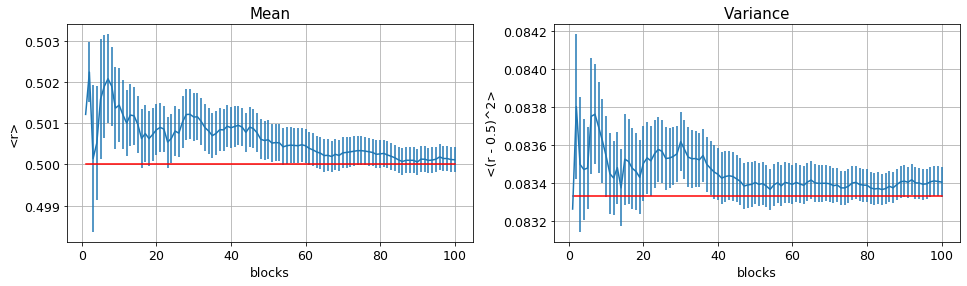

On the last block
mean estimate:     0.5001140 ± 0.0002980 ,	expected value:  0.5
variance estimate: 0.0834056 ± 0.0000778 ,	expected value:  0.0833


In [4]:
x = np.arange(len(df_mean)) + 1
mean_teo = np.zeros(len(df_mean)) + 1./2.
var_teo = np.zeros(len(df_mean)) + 1./12.

plt.rcParams.update({'font.size': 12.5})
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

ax = ax1
ax.set_title("Mean")
ax.errorbar(x, df_mean.iloc[:, 0], yerr=df_mean.iloc[:, 1])
ax.plot(x, mean_teo, color='r', linestyle='-')
ax.set_xlabel("blocks")
ax.set_ylabel("<r>")
ax.grid(True)

ax = ax2
ax.set_title("Variance")
ax.errorbar(x, df_var.iloc[:, 0], yerr=df_var.iloc[:, 1])
ax.plot(x, var_teo, color='r', linestyle='-')
ax.set_xlabel("blocks")
ax.set_ylabel("<(r - 0.5)^2>")
ax.grid(True)

plt.show()

print("On the last block")
print(f"mean estimate:     {format(df_mean.iloc[-1, 0], '.7f')} ± {format(df_mean.iloc[-1, 1], '.7f')} ,\texpected value: ", 1./2.)
print(f"variance estimate: {format(df_var.iloc[-1, 0], '.7f')} ± {format(df_var.iloc[-1, 1], '.7f')} ,\texpected value: ", format(1./12., '.4f'))

We can observe that the estimates are compatible with the exact results within the respective statistical errors.

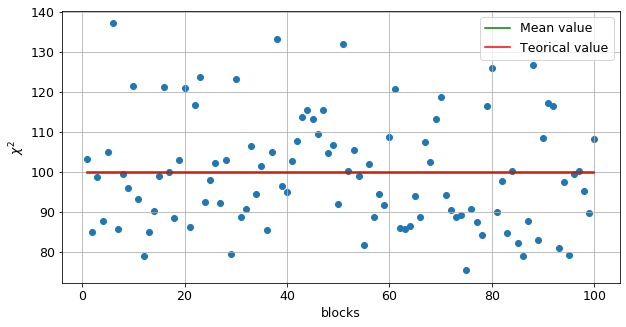

Mean value:     99.764
Teorical value: 100


In [5]:
x = np.arange(len(df_mean)) + 1
mean_chi = np.mean(df_chi.iloc[:, 0])

plt.rcParams.update({'font.size': 12.5})
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, df_chi.iloc[:, 0], linestyle='-')
ax.plot([1, 100], [mean_chi, mean_chi], linestyle='-', color='green', label='Mean value')
ax.plot([1, 100], [100, 100], linestyle='-', color='red', label='Teorical value')
ax.set_xlabel("blocks")
ax.set_ylabel(r'$\chi^{2}$')
ax.legend()
ax.grid(True)
plt.show()

print(f"Mean value:     {format(mean_chi, '.3f')}")
print(f"Teorical value: 100")

In order to try to estimate the probability that $r$ are not drawn from a uniform distribution, we divide $[0,1]$ into $M = 100$ identical sub-intervals and implement the $\chi^2$ test. The number of expected events observed in each sub-interval after $n$ extractions, according to a uniform distribution, is $np = n\times 1/M= n/M$. In this case then, the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals. This result is also shown in the next picture.

As expected, the value of $\chi^2$ is ditributed around the number of sub-intervals, 100.

### Exercise 01.2

In [6]:
df_s1 = pd.read_csv("../data/data_01.2/Sampling_1.txt", sep="\t")
df_s2 = pd.read_csv("../data/data_01.2/Sampling_2.txt", sep="\t")
df_s10 = pd.read_csv("../data/data_01.2/Sampling_10.txt", sep="\t")
df_s100 = pd.read_csv("../data/data_01.2/Sampling_100.txt", sep="\t")

dfs = [df_s1, df_s2, df_s10, df_s100]
Ns = [1, 2, 10, 100]

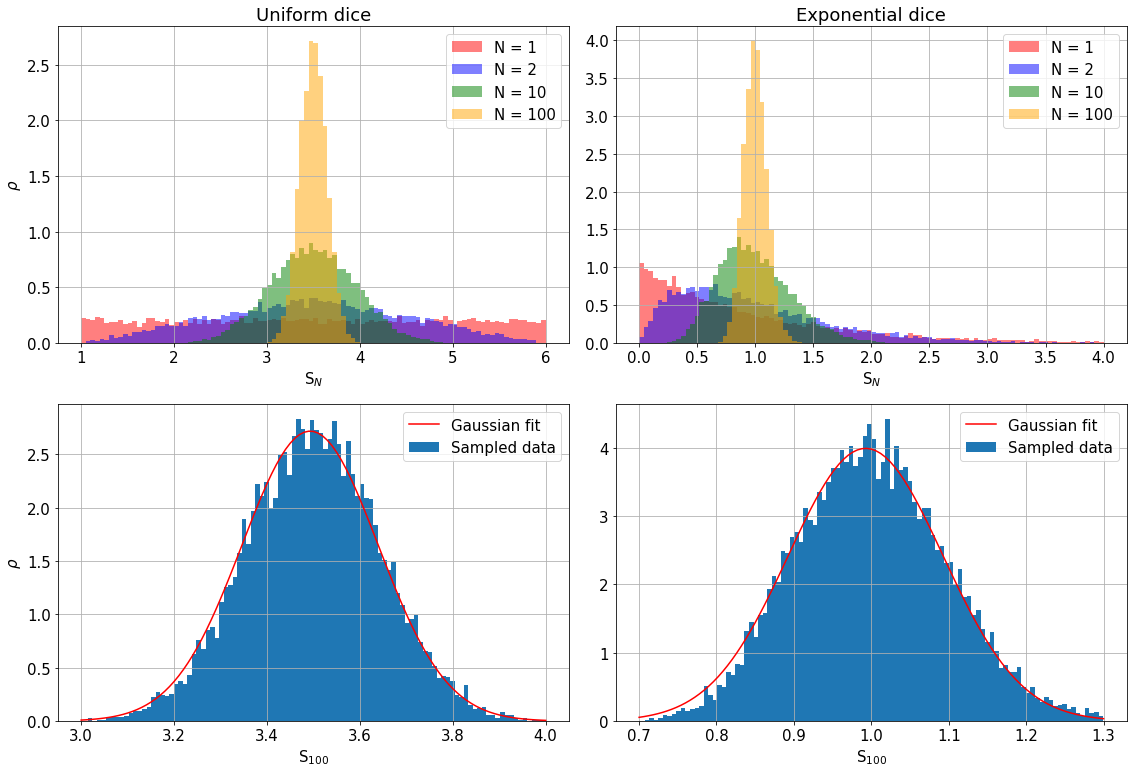

Fit, best parameters:
Uniform dice:                 mu=3.49, sigma=0.15
Exponential dice (lambda=1):  mu=0.99, sigma=0.10


In [7]:
pdf_origs = ['Uniform', 'Exponential']
binss = [np.linspace(1, 6, 101), np.linspace(0, 4, 101)]
x_ranges = [[3, 4], [0.7, 1.3]]
p0s = [[3.5, 0.5], [1., 0.4]]
titles = [r"Uniform dice", r"Exponential dice"]
colors = ["red", "blue", "green", "orange"]

plt.rcParams.update({'font.size': 15})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 11))

# rho sampling
axs = [ax1, ax2]
for ax, pdf_orig, bins, title in zip(axs, pdf_origs, binss, titles):
        
    for df, color, N in zip(dfs, colors, Ns):
        ax.hist(df[pdf_orig], bins, density=True, alpha=0.5, color=color, label=f"N = {N}")
        
    ax.set_xlabel(r"S$_N$")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    if axs.index(ax) == 0:
        ax.set_ylabel(r"$\rho$")

# rho fit
axs = [ax3, ax4]
bins = 101
df_s100 = dfs[-1]

params = []
for ax, pdf_orig, x_range, p0 in zip(axs, pdf_origs, x_ranges, p0s):
    df = df_s100[pdf_orig].dropna()
    x = np.linspace(x_range[0], x_range[1], bins)
    df = df[df > x_range[0]][df < x_range[1]]
    y = get_heights(df=df, bins=bins)

    pars_val, pars_cov = scipy.optimize.curve_fit(gauss, x, y, p0=p0)
    params.append(pars_val)
    ax.plot(x, gauss(x, pars_val[0], pars_val[1]), color='red', linestyle='-', label='Gaussian fit')
    ax.hist(df, bins=bins, density=True, label='Sampled data')

    ax.set_xlabel(r"S$_{100}$")
    ax.legend()
    ax.grid(True)

    if axs.index(ax) == 0:
        ax.set_ylabel(r"$\rho$")

fig.tight_layout()
plt.show()

# parameter print
print("Fit, best parameters:")
print(f"Uniform dice:                 mu={format(params[0][0], '.2f')}, sigma={format(params[0][1], '.2f')}")
print(f"Exponential dice (lambda=1):  mu={format(params[1][0], '.2f')}, sigma={format(params[1][1], '.2f')}")

The first two plots show the distribution of $S_N$ using $x_i$ extracted from an uniform distribution (i.e. $x_i$ ~ $\chi_{[0, 1)}$, top left picture) and from an exponential distribution (i.e. $x_i$ ~ $\frac{1}{\lambda}e^{-\lambda x}$ with $\lambda=1$, top right picture). Both starting distributions satisfy the hypotesis of the CLT and fot both of them, as shown in the last two bottom plots, the $S_{100}$ distribution converges to a Gaussian pdf. 

The best parameters extracted from each fit are shown at the bottom of the image.

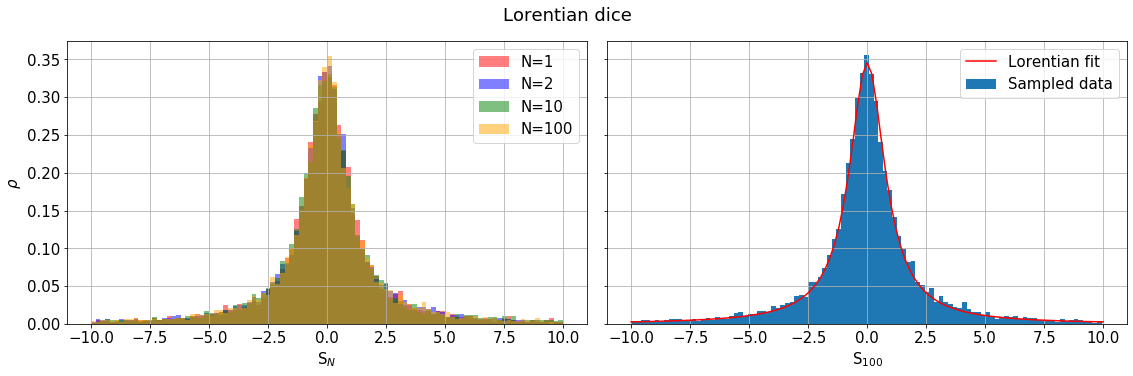

Fit, best parameters:
Lorentian pdf (mu=0, Gamma=1): mu= 0.0039 , Gamma= 0.9212


In [8]:
bins = np.linspace(-10, 10, 101)
x_range = [-10, 10]
colors = ["red", "blue", "green", "orange"]

plt.rcParams.update({'font.size': 15})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
fig.suptitle(r"Lorentian dice", y=1.05)

# rho sampling
ax = ax1
for df, color, N in zip(dfs, colors, Ns):
    ax.hist(df['Cauchy'], bins, density=True, alpha=0.5, color=color, histtype="stepfilled", label=f"N={N}")
        
ax.set_xlabel(r"S$_N$")
ax.legend()
ax.grid(True)
ax.set_ylabel(r"$\rho$")

# rho fit
ax = ax2
bins = 101
df = dfs[-1]['Cauchy'].dropna()
x = np.linspace(x_range[0], x_range[1], bins)
df = df[df > x_range[0]][df < x_range[1]]
y = get_heights(df=df, bins=bins)

pars_val, pars_cov = scipy.optimize.curve_fit(cauchy, x, y, p0=[1., 0])
ax.plot(x, cauchy(x, pars_val[0], pars_val[1]), color='red', linestyle='-', label='Lorentian fit')
ax.hist(df, bins=bins, density=True, label='Sampled data')

ax.set_xlabel(r"S$_{100}$")
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.show()

# parameter print
print("Fit, best parameters:")
print("Lorentian pdf (mu=0, Gamma=1): mu=", format(pars_val[1], '.4f'), ", Gamma=", format(pars_val[0], '.4f'))

An example of a distribution which does not satisfy the hypotesis of the CLT is the Lorentian (or Cauchy) distribution. However in this case $\rho_{S_N}$ converges to the Cauchy pdf for $N\rightarrow\infty$. This is in good agreement with the result shown in the bottom right picture.

In the simulation, the starting distribution is $x_i$ ~ $L(\mu, \Gamma)$, with $\mu=0, \Gamma=1$. Again, the best parameters extracted from the Cauchy pdf fit are shown at the bottom of the picture.

### Exercise 01.3

In [9]:
df_pi = pd.read_csv("../data/data_01.3/pi_data.txt", sep="\t")

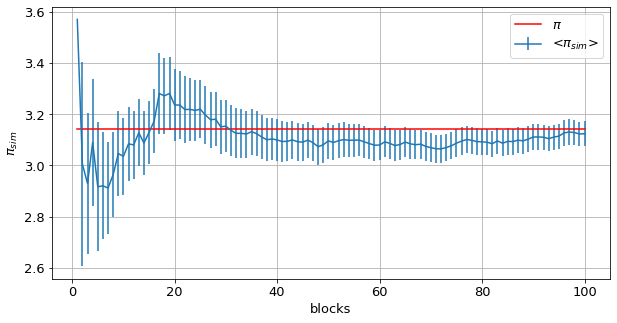

On the last block
estimate: 3.12405 ± 0.0479994


In [10]:
x = np.arange(len(df_pi)) + 1
mean_teo = np.zeros(len(df_pi)) + math.pi

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(x, df_pi.iloc[:, 0], yerr=df_pi.iloc[:, 1], label="<$\pi_{sim}$>")
ax.plot(x, mean_teo, color='r', linestyle='-', label="$\pi$")
ax.set_xlabel("blocks")
ax.set_ylabel(r"$\pi_{sim}$")
ax.grid(True)
ax.legend()
plt.show()

print("On the last block")
print(f"estimate: {format(df_pi.iloc[-1, 0], '.5f')} ± {format(df_pi.iloc[-1, 1], '.7f')}")

In order to simulate the experiment, there is the need to randomly generate the position of the center of the needle between the interval $[0, d]$ and its inclination between the interval $[-\pi/2, \pi/2]$. Since using $\pi$ to compute an estimate of itself would defeat the purpose of the experiment, the angle was generated extracting a couple of values ($x$ from the interval $[0, 1]$, $y$ from $[-1, 1]$). If $r^2 = x^2+y^2 > 1$, a new couple was generated and this was repeated until $r^2 \leq 1$. The random point obtained is on an opened semidisk and can be described in the form $(rcos(\theta), rsin(\theta))$. We can thus get a value of uniformly distribuited between the interval $[-\pi/2, \pi/2]$ from the equation $cos(\theta) = x/r$.

In the picture, the estimate $\pi_{sim}$ is shown to converge to the actual $\pi$ value within the statistical uncertainty.